
# Getting the data
---



In [1]:
# Importing the needed packages 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Downloading the helper function file 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Importing series of function for our use 
from helper_functions import unzip_data, plot_loss_curves, compare_historys

# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-02-24 11:12:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-24 11:12:01 (50.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]

--2022-02-24 11:12:01--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.121.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [

In [3]:
# Loading in the data 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Shuffling the training dataframe 
train_df_shuffled = train_df.sample(frac =1 , random_state= 42)

# Split our data into training and test sets 
from sklearn.model_selection import  train_test_split
train_sentences , val_sentences , train_labels , val_labels = train_test_split(train_df_shuffled['text'].to_numpy() , 
                                                                               train_df_shuffled['target'].to_numpy(), 
                                                                               test_size = 0.1 , 
                                                                               random_state = 42)

# Checking the shapes 
train_sentences.shape , val_sentences.shape , train_labels.shape , val_labels.shape

((6851,), (762,), (6851,), (762,))

In [4]:
# Setting up text vectorization 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_vocab_length = 10000 
max_length = 15 

text_vectorizer = TextVectorization(max_tokens = max_vocab_length , 
                                    output_mode = 'int', 
                                    output_sequence_length = max_length)

# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

# Creating a embedding layer 
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim= max_vocab_length , 
                             output_dim = 128 , 
                             embeddings_initializer = 'uniform', 
                             input_length = max_vocab_length)

# Model_1 = (A simple Dense model)


In [5]:
# Building the model 1 (A simple Dense model)
model_1 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_1_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 14ms/step - loss: 0.6086 - accuracy: 0.6946 - val_loss: 0.5343 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4405 - accuracy: 0.8192 - val_loss: 0.4723 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3464 - accuracy: 0.8602 - val_loss: 0.4592 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2840 - accuracy: 0.8908 - val_loss: 0.4672 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2369 - accuracy: 0.9123 - val_loss: 0.4864 - val_accuracy: 0.7900


# Model 2 = (An LSTM model)

In [6]:
# Building the model 2 (An LSTM model)
model_2 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.LSTM(64), 
    #layers.GlobalAveragePooling1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_2_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2014 - accuracy: 0.9270 - val_loss: 0.5032 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1720 - accuracy: 0.9400 - val_loss: 0.5220 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1484 - accuracy: 0.9510 - val_loss: 0.5639 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1311 - accuracy: 0.9537 - val_loss: 0.5817 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1160 - accuracy: 0.9615 - val_loss: 0.6123 - val_accuracy: 0.7769


# Model 5 = (Conv1D Model)

In [7]:
# Building the model 5 (Conv1D Model)
# Building the model 1 (A simple Dense model)
model_5 = tf.keras.Sequential([
    layers.Input(shape = (1, ) , dtype = 'string'), 
    text_vectorizer , 
    embedding , 
    layers.Conv1D(32 , 5 , activation= 'relu'),
    layers.GlobalMaxPool1D() , 
    layers.Dense(1, activation = 'sigmoid')
    ])
    
# Compiling the model 
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model 
model_5_history =  model_1.fit(train_sentences, 
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1046 - accuracy: 0.9648 - val_loss: 0.6459 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0949 - accuracy: 0.9685 - val_loss: 0.6825 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0862 - accuracy: 0.9714 - val_loss: 0.7117 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0804 - accuracy: 0.9720 - val_loss: 0.7444 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0753 - accuracy: 0.9750 - val_loss: 0.7748 - val_accuracy: 0.7690


2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [8]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences)) # Directly taking 10% from our train data
print(train_10_percent_split)

# Splitting our train data with the actual train_data (no double dipping this time)
train_sentences_10_percent = train_sentences[:train_10_percent_split]

# Doing the same but with the train labels 
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent) , train_labels_10_percent[:5]

685


(685, array([0, 0, 1, 0, 0]))

In [9]:
# Building a base line model 
from sklearn.feature_extraction.text import TfidfVectorizer # (turn text into numbers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 

# Create tokenization and modelling pipeline
baseline_model = Pipeline([
                  ('tfidf' , TfidfVectorizer()) , # Convert words to numbers using tfidf
                  ('clf' , MultinomialNB()), # Model the text 
                ])

# Fit the pipeline to the training data 
baseline_model.fit(train_sentences_10_percent , train_labels_10_percent)

# Evaluating our baseline model 
baseline_score = baseline_model.score(val_sentences , val_labels)
baseline_score

0.7020997375328084

3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer

In [10]:
# Turn training on to fine-tune the TensorFlow Hub model
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True)

In [11]:
# Create model using the Sequential API
use_model = tf.keras.Sequential([
  sentence_encoder_layer, 
  layers.Dense(1, activation="sigmoid")
])

# Compile model
use_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
use_model_history = use_model.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 14s 277ms/step - loss: 0.6245 - accuracy: 0.6803 - val_loss: 0.5646 - val_accuracy: 0.7835
Epoch 2/5
22/22 [==============================] - 5s 250ms/step - loss: 0.4799 - accuracy: 0.8175 - val_loss: 0.4997 - val_accuracy: 0.7822
Epoch 3/5
22/22 [==============================] - 5s 251ms/step - loss: 0.3218 - accuracy: 0.9051 - val_loss: 0.4748 - val_accuracy: 0.7861
Epoch 4/5
22/22 [==============================] - 6s 252ms/step - loss: 0.1881 - accuracy: 0.9650 - val_loss: 0.4736 - val_accuracy: 0.7861
Epoch 5/5
22/22 [==============================] - 6s 251ms/step - loss: 0.1058 - accuracy: 0.9898 - val_loss: 0.5141 - val_accuracy: 0.7690


4. Retrain the best model you've got so far on the whole training set (no validation split).

In [12]:
whole_train_sentences = train_df_shuffled['text'].to_numpy()
whole_train_labels =  train_df_shuffled['target'].to_numpy() 

len(whole_train_sentences) , len(whole_train_labels)

(7613, 7613)

In [13]:
# Create model using the Sequential API
model = tf.keras.Sequential([
  sentence_encoder_layer, 
  layers.Dense(64 , activation ='relu'),
  layers.Dense(1, activation="sigmoid")
])

# Compile model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
model_history =model.fit(whole_train_sentences,
                              whole_train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
238/238 [==============================] - 62s 238ms/step - loss: 0.4091 - accuracy: 0.8218 - val_loss: 0.2490 - val_accuracy: 0.9173
Epoch 2/5
238/238 [==============================] - 56s 235ms/step - loss: 0.2036 - accuracy: 0.9253 - val_loss: 0.0907 - val_accuracy: 0.9724
Epoch 3/5
238/238 [==============================] - 56s 236ms/step - loss: 0.0706 - accuracy: 0.9764 - val_loss: 0.0518 - val_accuracy: 0.9843
Epoch 4/5
238/238 [==============================] - 56s 235ms/step - loss: 0.0409 - accuracy: 0.9854 - val_loss: 0.0324 - val_accuracy: 0.9869
Epoch 5/5
238/238 [==============================] - 56s 235ms/step - loss: 0.0288 - accuracy: 0.9894 - val_loss: 0.0225 - val_accuracy: 0.9948


In [14]:
# Make predictions with the model
pred_probs = model.predict(test_df['text'].to_numpy())

# Convert prediction probs to labels
preds = tf.squeeze(tf.round(pred_probs))
preds = tf.cast(preds , dtype = tf.int32)

In [15]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [16]:
submission = pd.DataFrame({'id': test_df['id'].values , 
                           'target': (preds.numpy())})
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [17]:
preds[:20]

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int32)>

In [18]:
submission.to_csv('submission.csv' , index = False)

# 5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?

In [19]:
test_sentences = test_df['text'].to_numpy()

# Checking the shapes 
test_sentences.shape

(3263,)

In [20]:
# Getting the model predictions 

def give_preds(model, test_sentences):
  '''
  This model takes a model and the test sentences as input. 
  Returns the prediction array of [0,1.....]
  '''
  pred_probs = model.predict(test_sentences)
  preds = tf.squeeze(tf.round(pred_probs))
  preds = tf.cast(preds , dtype = tf.int32)

  return preds

In [21]:
# Getting the predictions for our 3 models 
model_preds = give_preds(model , test_sentences)
model_2_preds = give_preds(model_2 ,test_sentences)
model_5_preds = give_preds(model_5 , test_sentences)

# Checking the shapes of our prediction 
model_preds.shape , model_2_preds.shape , model_5_preds.shape

(TensorShape([3263]), TensorShape([3263]), TensorShape([3263]))

In [22]:
model_preds[:5] , model_2_preds[:5] , model_5_preds[:5]

(<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 1, 1, 1, 1], dtype=int32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 1, 0, 1], dtype=int32)>,
 <tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 0, 0, 0], dtype=int32)>)

In [23]:
# Creating a dataframe of our predictions 

preds_df = pd.DataFrame({'USE_model': model_preds , 
              'LSTM_model': model_2_preds , 
              'Conv1D_model': model_5_preds})
preds_df.head()

,USE_model,LSTM_model,Conv1D_model
0,1,0,0
1,1,1,0
2,1,1,0
3,1,0,0
4,1,1,0


In [24]:
# Majority voted predictions of our model
preds_df['majority_vote_preds'] = preds_df.mode(axis = 1)
preds_df.head()

,USE_model,LSTM_model,Conv1D_model,majority_vote_preds
0,1,0,0,0
1,1,1,0,1
2,1,1,0,1
3,1,0,0,0
4,1,1,0,1


In [25]:
# Converting the column into a numpy array 
mode_preds_array = preds_df['majority_vote_preds'].to_numpy()
mode_preds_array

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

# 6. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.


In [26]:
# Funtion taken from the course 
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [27]:
# Predictions on the validation sentences 
val_preds = give_preds(model , val_sentences)

# Creating a array of our class names 
class_names = ['not_a_disaster' , 'disaster']

# Checking the preds and true labels shape
val_preds.shape , val_labels.shape

(TensorShape([762]), (762,))

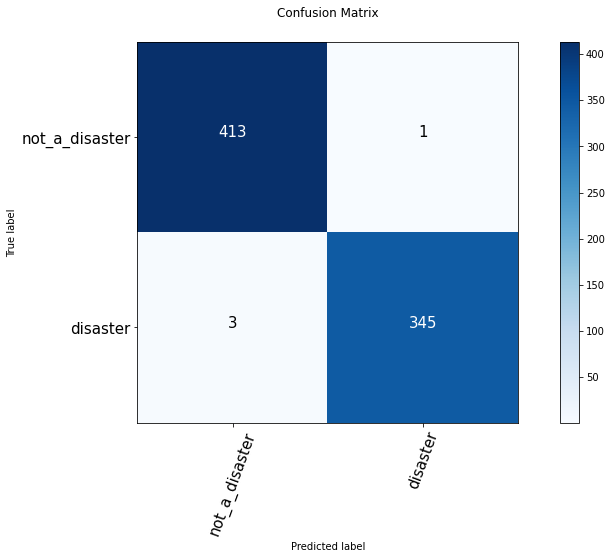

In [28]:
# Plotting the confusion matrix 
make_confusion_matrix(y_true= val_labels , 
                      y_pred = val_preds , 
                      classes = class_names , 
                      figsize= (15 , 7), 
                      norm = False , 
                      savefig = True , 
                      text_size = 15)